In [1]:
# -*- coding: utf-8 -*-
"""
07/31/2021
7:45pm
This is a place to perform a simple correlation analysis between two stocks,
ENPH and SEDG. 
We will use yfinance, numpy, and pandas.
Start small, compound.
Enjoy
"""

#This is a basic analysis. It will practice getting stock data,
#manipulating pandas data frames and perhaps numpy arrays, as well as performing data analysis
#using some features of pandas to set up correlations and maybe a plot

import yfinance as yf
import pandas as pd
import numpy as np


"""08/07 Saturday 3:23pm"""

#What stocks? ENPH and SEDG

tickers = ['enph', 'sedg']
stock_data = yf.download(tickers, start = '2019-01-1', ends = '2021-08-6')

stock_data.head()
#Do note that the columns have 2 indices: Adj Close, open, etc AND THEN ENPH/SEDG


[*********************100%***********************]  2 of 2 completed


Adj Close            Close             High              Low  \
                ENPH       SEDG  ENPH       SEDG  ENPH       SEDG  ENPH   
Date                                                                      
2019-01-02      4.92  36.150002  4.92  36.150002  4.93  36.445000  4.61   
2019-01-03      4.76  35.500000  4.76  35.500000  4.98  37.068001  4.74   
2019-01-04      5.08  37.250000  5.08  37.250000  5.11  37.380001  4.83   
2019-01-07      5.26  35.009998  5.26  35.009998  5.39  37.200001  4.90   
2019-01-08      5.35  35.000000  5.35  35.000000  5.48  35.737000  5.21   

                       Open              Volume           
                 SEDG  ENPH       SEDG     ENPH     SEDG  
Date                                                      
2019-01-02  34.349998  4.63  34.410000   756500   534100  
2019-01-03  35.500000  4.86  35.680000  1305300   871700  
2019-01-04  35.220001  4.86  35.910000  1814400  1008300  
2019-01-07  34.919998  5.12  37.200001  1458700  1147600  
2019-01-08  34.049999  5.33  35.360001  1222600   761500

<AxesSubplot:xlabel='Date'>

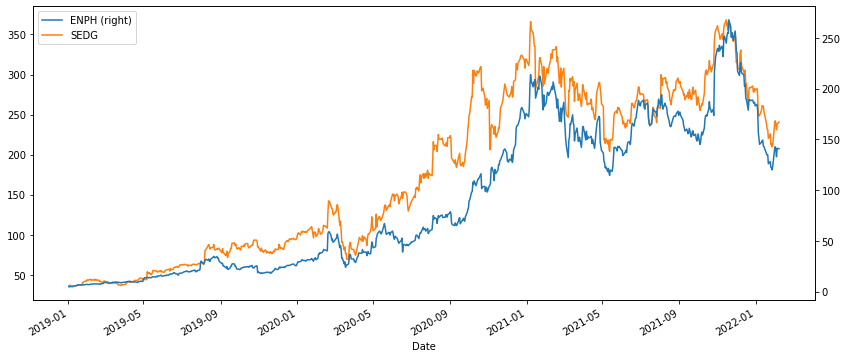

In [2]:
#Now we are going to plot each series' adjusted close price to check how they were at end of day

#we set secondary y axis so we can see one with scale on the left, other on the right


stock_data['Adj Close'].plot(secondary_y = 'ENPH', figsize = (14,6))

#Look at that graph. Wow. Remarkable!!


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

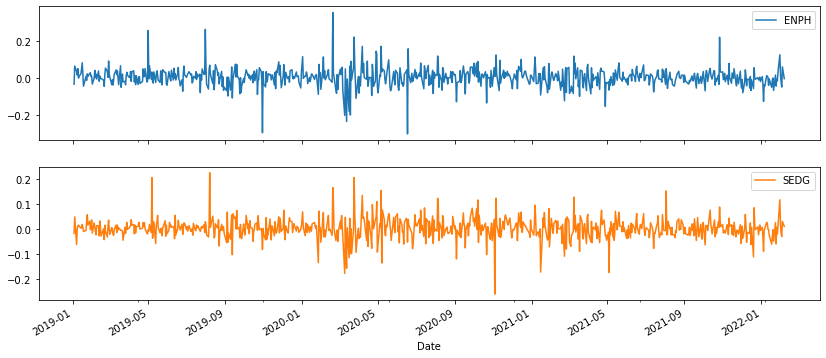

In [3]:

#Next we are going to set up the data to do a regression.
#We are going to use log % returns rather than straight up closing prices 
#so let's get it going here

returns = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))
#When we take the returns we are doing a today - yesterday / yesterday operation
#which yields an NA because we dont have something for day minus one
#So we need to GET! IT! OUTTA HEREEEE!!

returns.dropna(inplace = True) #Baaang!!
#Let's check out the returns. Note quickly that our stock plots
#look like brownian motions upward

returns.plot(subplots = True, figsize = (14, 6))
#Now we have that white noise looking view
#But is it white noise? (probably not but this analysis won't explore that today)

array([[<AxesSubplot:xlabel='ENPH', ylabel='ENPH'>,
        <AxesSubplot:xlabel='SEDG', ylabel='ENPH'>],
       [<AxesSubplot:xlabel='ENPH', ylabel='SEDG'>,
        <AxesSubplot:xlabel='SEDG', ylabel='SEDG'>]], dtype=object)

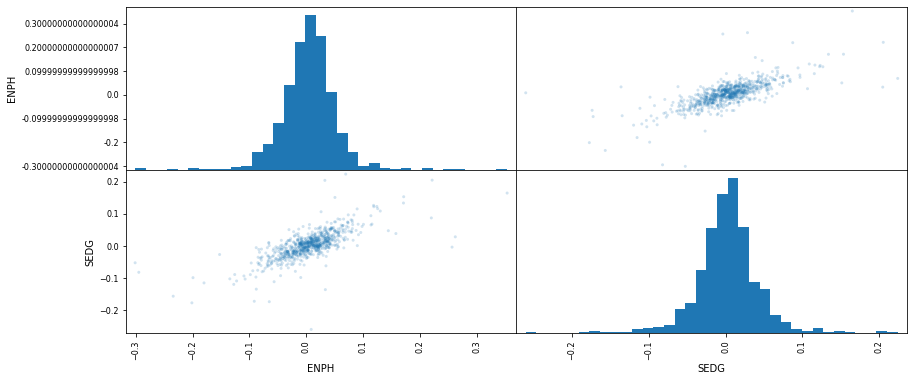

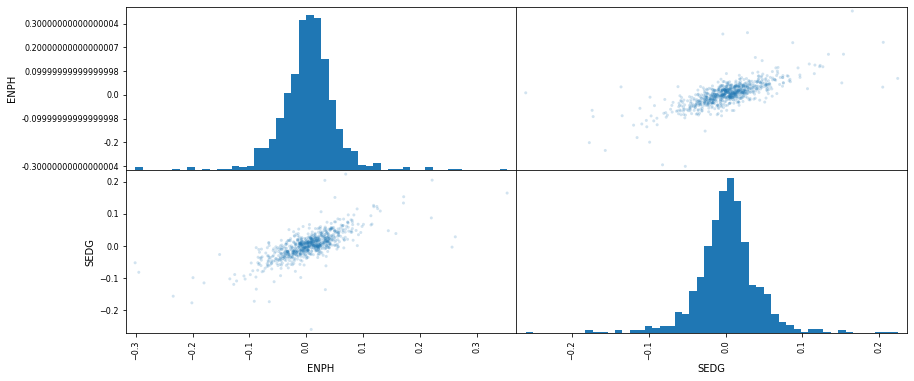

In [4]:
#Let's also look at the histograms of returns to get an idea of what they look like, probably (lol)

#We are going to use pandas plotting scatter matrix, it will also show a point cloud thing for something

pd.plotting.scatter_matrix(returns, alpha = 0.2, 
                           diagonal = 'hist', 
                           hist_kwds ={'bins' : 35}, figsize = (14, 6))

#Let's do this again with 50, straight copy and paste this one. We won't go beyond that

pd.plotting.scatter_matrix(returns, alpha = 0.2, 
                           diagonal = 'hist', 
                           hist_kwds ={'bins' : 50}, figsize = (14, 6))

#Neat! These stocks have (what appear to me) tight dfistributions.
#Big ol peaks there and then it comes down sharply and then slopes outward to the tails
#The clouds, which look like a multivar dist plot, are positively correlated, not quite normal

'End 3:58 pm'

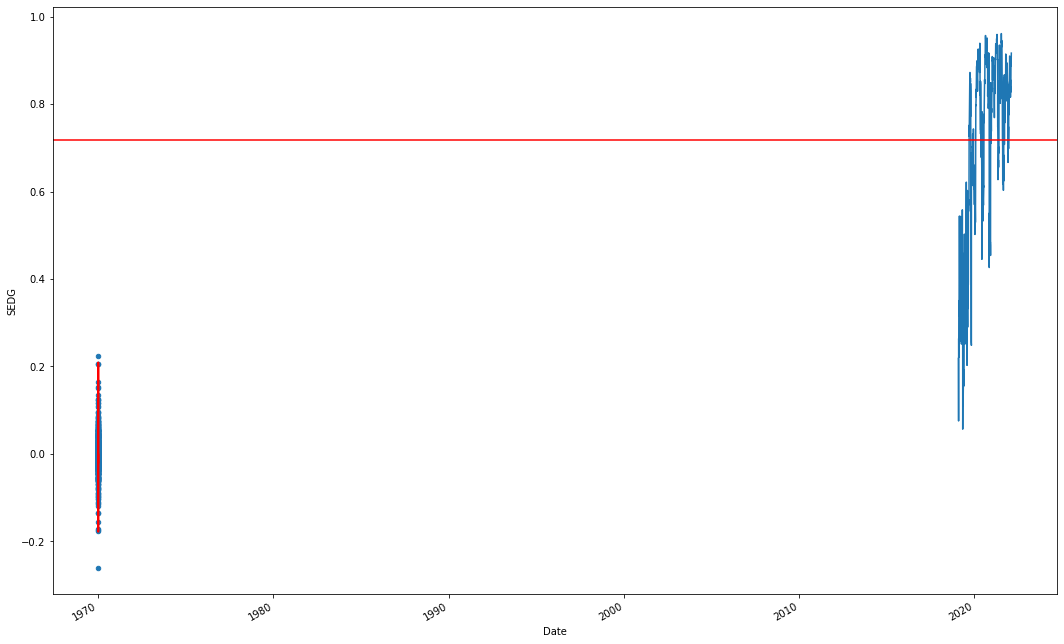

In [5]:
#Time for regression. We are going to be using np.polyfit and np.polyval (who knew these existed?!)
#Jump on it

regression = np.polyfit(returns['ENPH'], returns['SEDG'], deg = 1) #deg = 1 for linear regression

#And to plot

ax = returns.plot(kind = 'scatter', x = 'ENPH', y = 'SEDG', figsize = (18,12))
ax.plot(returns['ENPH'], np.polyval(regression, returns['ENPH']), linewidth = 2, color = 'r')


#The slope of the line is positive, supporting the claim that these two stocks are pos. correalted

#Let's look at the static (for all time) correlation

returns.corr()
#Yields correlation of 0.705705 My god this could be a pairs trade

#Time for a rolling correlation across time, and a nice plotto

ax = returns['ENPH'].rolling(window = 20).corr(returns['SEDG']).plot(figsize = (18,12))
ax.axhline(returns.corr().iloc[0,1], c = 'r')

#So we see that the correlation between these to solar firms is always positive
#And has an average of about 0.71
#It varies a bit over time, but seems to trend upward with seasonal or cyclical patterns
#I wonder how this looks for pairs of stocks in the industry, and beyond


#And that's literally the end of this brief, brief analysis.
#Enjoy the rest of your day!

"""End 3:58 pm"""